---
format:
  html:
    code-line-numbers: false
    code-overflow: wrap
    code-block-bg: true
    code-block-border-left: true
    highlight-style: arrow
  pdf:
    documentclass: scrreprt
    links-as-notes: true
    reference-location: section
    toc: true
    toc-depth: 2
    lof: true
    lot: true
    number-sections: true
    fig-width: 8
    fig-height: 6

---

# Generalized Assignment Problem

Assignment problems are really everywhere, that is, if we look around carefully.
For example, vehicle routing problem could be formulated as an assignment problem coupled with a traveling salesman problem for each vehicle.
The job shop scheduling problem involves assigning job processes onto machines and optimizing the processes on each machine to minimize a certain criterion like makespan.
In this chapter, we examine the generalized assignment problem and its solution approach via Lagrangian relaxation.

The Generalized Assignment Problem (GAP) is a well-known problem in operations research and combinatorial optimization. It is an extension of the classic assignment problem where a set of tasks needs to be assigned to a set of agents, with each task requiring a specific amount of resources from the assigned agent. However, in the generalized version, multiple agents can be assigned to a single task, and each agent may have a limit on the amount of resource it can contribute. 

## Formulation



Formally, the Generalized Assignment Problem can be defined as follows:

Given:

- A set of tasks, $T = \{1, 2, ..., n\}$
- A set of agents, $A = \{1, 2, ..., m\}$
- For each task $i$ and agent $j$, a cost or profit $c_{ij}$ associated with assigning task $i$ to agent $j$
- For each task $i$ and agent $j$, a resource requirement $r_{ij}$ specifying the amount of resource needed from agent $j$ to complete task $i$
- For each agent $j$, a capacity $b_j$ specifying the maximum amount of resource that agent $j$ can contribute

The goal is to find an assignment of tasks to agents that minimizes the total cost or maximizes the total profit, while ensuring that each task is assigned to one or more agents, and the total resource requirement of each agent does not exceed its capacity.

Mathematically, the GAP can be formulated as an integer linear programming problem. One possible formulation is as follows:

\begin{align}
\text{min.} &\quad \sum_{i=1}^{n} \sum_{j=1}^{m} c_{ij} x_{ij} \label{gap-obj}\\
\text{s.t.} &\quad \sum_{j=1}^{m} x_{ij} = 1, \ \forall i = 1, 2, ..., n \label{gap-cons1}\\
&\quad \sum_{i=1}^{n} r_{ij} x_{ij} \leq b_j, \  \forall j = 1, 2, ..., m \label{gap-cons2}\\
&\quad x_{ij} \in \{0, 1\}, \ \forall i = 1, 2, ..., n, j = 1, 2, ..., m \label{gap-cons3}
\end{align}

where $x_{ij}$ is a binary decision variable that equals 1 if task $i$ is assigned to agent $j$, and 0 otherwise.

The first set of constraints ensures that each task is assigned to exactly one agent, and the second set of constraints ensures that the total resource requirement of each agent does not exceed its capacity.

Solving the GAP can be computationally challenging, especially for large instances, as it is a generalization of the classic assignment problem, which is known to be polynomial-time solvable. Various algorithms and heuristics, such as branch and bound, dynamic programming, and approximation algorithms, can be employed to find feasible or optimal solutions to the GAP.


## Lagrangian Relaxation

The essence of Lagrangian relaxation is to choose some 'hard' constraints in the original model formulation and put them into the objective function.
In the meantime, Lagrange multipliers are used to penalize the violations of these constraints.
In the GAP formulation, we could choose the constraints \eqref{gap-cons1} and put them into the objective function, which gives us the corresponding Lagrangian relaxation:

\begin{align}
LR(v): \text{min.} &\quad \sum_{i=1}^{n} \sum_{j=1}^{m} c_{ij} x_{ij} + \sum_{i=1}^{n} v_i (\sum_{j=1}^{m} x_{ij} - 1) \label{gap-lr-obj}\\
\text{s.t.} &\quad \sum_{i=1}^{n} r_{ij} x_{ij} \leq b_j, \  \forall j = 1, 2, ..., m \label{gap-lr-cons1}\\
&\quad x_{ij} \in \{0, 1\}, \ \forall i = 1, 2, ..., n, j = 1, 2, ..., m \label{gap-lr-cons2}
\end{align}


In the above formulation, $v_i$ is the Lagrange multiplier associated with each task $i$.
Note that the optimal objective value of $LR(v)$ for a given $v$ serves as a lower bound of the original problem.
Our goal is then to find the best value of $v$ such that the best lower bound is obtained for the original problem.

## Implementation

Optimization is fun, especially when we turn our curated models and algorithms into computer codes using our favorite programming languages.
In this section, we will solve some GAP instances using Lagrangian Relaxation!

### Benchmarking instances

All the benchmarking instances we solve here are taken from the [OR-Library](http://people.brunel.ac.uk/~mastjjb/jeb/orlib/gapinfo.html).
There are a total of 16 data files, among which the first 12 data files are gap1, gap2, ..., gap12, and the remaining 4 data files are gapa, gapb, gapc and gapd.

All the data files are formatted as follows:
  
- The total number of problem instances in the data set ($P$)
- For each problem set $p$ ($p = 1,...,P$) in turn:
  - The number of agents ($m$), number of tasks ($n$)
  - For each agent $i$ ($i = 1,...,m$) in turn:
    - The cost of allocating task $j$ to agent $i$ ($j = 1,...,n$)
  - For each agent $i$ ($i = 1,...,m$) in turn:
    - The resource consumed in allocating task $j$ to agent $i$ ($j = 1,...,n$)
  - The resource capacity of agent $i$ ($i = 1,...,m$)

Since we have the luxury of unlimited space in this online book, I will show the full content of the data file *gap1.txt*.
This file contains 5 GAP instances and all of them have the same number of agents (5) and tasks (15).

```{.txt filename="gap1.txt"}
 5
 5 15
 17 21 22 18 24 15 20 18 19 18 16 22 24 24 16
 23 16 21 16 17 16 19 25 18 21 17 15 25 17 24
 16 20 16 25 24 16 17 19 19 18 20 16 17 21 24
 19 19 22 22 20 16 19 17 21 19 25 23 25 25 25
 18 19 15 15 21 25 16 16 23 15 22 17 19 22 24
 8 15 14 23 8 16 8 25 9 17 25 15 10 8 24
 15 7 23 22 11 11 12 10 17 16 7 16 10 18 22
 21 20 6 22 24 10 24 9 21 14 11 14 11 19 16
 20 11 8 14 9 5 6 19 19 7 6 6 13 9 18
 8 13 13 13 10 20 25 16 16 17 10 10 5 12 23
 36 34 38 27 33
 5 15
 19 23 24 20 20 25 16 21 24 15 17 17 20 20 20
 25 24 16 21 19 17 17 19 23 21 21 23 20 15 16
 16 21 25 22 24 24 16 17 15 18 15 17 18 24 18
 25 24 18 19 15 18 20 22 23 18 16 19 17 15 22
 25 19 21 22 20 15 20 19 18 18 17 23 17 25 25
 16 12 8 20 18 10 12 8 14 23 19 14 15 15 24
 16 18 19 22 13 20 9 7 25 10 20 13 11 15 16
 6 20 20 5 14 12 6 15 22 18 13 23 23 18 25
 18 23 25 17 25 13 23 23 13 20 20 23 17 19 24
 12 17 15 25 22 5 24 19 12 25 23 21 23 19 18
 36 37 38 48 44
 5 15
 22 21 16 17 21 15 17 22 22 25 18 20 24 15 22
 23 24 19 15 16 21 15 25 16 21 20 19 16 23 20
 21 20 21 25 21 20 21 19 17 16 25 19 15 15 15
 17 21 25 25 23 22 20 19 20 25 15 20 21 25 23
 15 25 23 19 17 17 25 24 24 17 24 19 18 19 16
 23 10 15 13 17 10 13 6 9 21 20 7 9 25 8
 17 13 8 23 11 18 7 22 13 5 24 24 15 10 22
 22 17 22 23 20 11 17 25 23 9 22 20 15 9 25
 5 19 25 16 15 10 18 9 11 20 7 21 15 8 25
 22 9 10 23 19 21 17 15 15 17 25 19 10 9 21
 32 37 44 35 40
 5 15
 15 25 20 18 19 21 18 22 24 15 25 17 17 15 22
 20 18 25 25 16 24 22 24 17 18 23 25 21 25 24
 25 19 18 18 23 18 15 22 23 16 25 22 22 15 16
 19 19 23 17 19 19 22 19 23 22 24 22 25 19 16
 25 24 17 19 25 19 23 19 25 15 19 21 18 19 22
 20 20 18 9 18 5 16 18 13 24 21 23 15 19 9
 5 12 18 8 22 19 19 11 7 19 20 17 21 25 5
 18 8 8 9 20 20 23 13 15 12 6 12 25 25 23
 17 19 24 9 16 22 10 17 12 17 15 21 16 18 6
 14 6 20 6 21 5 11 23 20 21 20 18 13 13 21
 39 36 37 38 37
 5 15
 25 25 18 24 20 19 25 24 23 15 18 18 25 15 22
 25 18 17 22 21 23 20 23 16 19 15 18 16 23 16
 18 16 19 15 15 18 15 20 19 24 22 20 25 16 21
 18 21 16 18 17 24 18 23 22 16 17 22 22 18 16
 17 18 15 21 23 21 24 23 20 22 19 15 22 22 25
 16 20 9 22 17 19 20 22 20 13 6 20 23 19 7
 12 22 18 18 6 13 17 17 17 14 20 12 17 14 22
 5 19 19 14 24 16 7 8 9 22 13 23 24 15 20
 20 8 6 9 5 17 23 18 14 12 14 17 15 23 21
 6 6 24 24 8 7 5 25 21 18 12 20 20 7 12
 40 38 38 35 34
 ```

@lst-gap-reader shows the python code that reads in all the instances from a data file and saves them into a Python list.

In [3]:
#| lst-label: lst-gap-reader
#| lst-cap: File reading function
def read_instance_file(file_path):
    instances = []

    with open(file_path, 'r') as file:
        num_instances = int(file.readline().strip())

        for _ in range(num_instances):
            num_agents, num_tasks = map(int, file.readline().split())

            costs = []
            for _ in range(num_agents):
                costs.append(list(map(int, file.readline().split())))

            resources = []
            for _ in range(num_agents):
                resources.append(list(map(int, file.readline().split())))

            capacities = list(map(int, file.readline().split()))

            instance = {
                'num_agents': num_agents,
                'num_tasks': num_tasks,
                'costs': costs,
                'resources': resources,
                'capacities': capacities
            }
            instances.append(instance)

    return num_instances, instances


Below we read the data file 'gap1.txt' and display the first instance.

In [4]:
# Example usage:
file_path = '/Users/klian/dev/books/large-scale-opt-python/data/gap/gap1.txt'  # Replace with the actual file path
num_instances, instances = read_instance_file(file_path)
instance = instances[0]
print(f'num_instances: {num_instances}')
print(f"num_agents: {instance['num_agents']}")
print(f"num_tasks: {instance['num_tasks']}")

num_instances: 5
num_agents: 5
num_tasks: 15


In [5]:
instance['costs']

[[17, 21, 22, 18, 24, 15, 20, 18, 19, 18, 16, 22, 24, 24, 16],
 [23, 16, 21, 16, 17, 16, 19, 25, 18, 21, 17, 15, 25, 17, 24],
 [16, 20, 16, 25, 24, 16, 17, 19, 19, 18, 20, 16, 17, 21, 24],
 [19, 19, 22, 22, 20, 16, 19, 17, 21, 19, 25, 23, 25, 25, 25],
 [18, 19, 15, 15, 21, 25, 16, 16, 23, 15, 22, 17, 19, 22, 24]]

In [6]:
instance['resources']

[[8, 15, 14, 23, 8, 16, 8, 25, 9, 17, 25, 15, 10, 8, 24],
 [15, 7, 23, 22, 11, 11, 12, 10, 17, 16, 7, 16, 10, 18, 22],
 [21, 20, 6, 22, 24, 10, 24, 9, 21, 14, 11, 14, 11, 19, 16],
 [20, 11, 8, 14, 9, 5, 6, 19, 19, 7, 6, 6, 13, 9, 18],
 [8, 13, 13, 13, 10, 20, 25, 16, 16, 17, 10, 10, 5, 12, 23]]

In [7]:
instance['capacities']

[36, 34, 38, 27, 33]

### Solve the original problem

In this section, we use SCIP to solve the original formulation of the GAP, which is given in @lst-scip-gap.

In [24]:
#| lst-label: lst-scip-gap
#| lst-cap: "SCIP solver for GAP"
import pyscipopt as scip
from pyscipopt import SCIP_PARAMSETTING

class ScipGapSolver:
    
    def __init__(self, instance):
        self._instance = instance
        self._model = scip.Model("GAP solver")
        self._vars = None
        
        self._opt_obj = None
    
    def build_model(self):
        # create decision variables
        self._vars = {
            (i, j): self._model.addVar(f"x_{i},{j}", vtype='B')
            for i in range(self._instance['num_tasks'])
            for j in range(self._instance['num_agents'])
        }
        
        # create objective
        obj_expr = [
            self._instance['costs'][j][i] * self._vars[(i, j)]
            for i in range(self._instance['num_tasks'])
            for j in range(self._instance['num_agents'])
        ]
        self._model.setObjective(scip.quicksum(obj_expr), "minimize")
        
        # create constraints
        for i in range(self._instance['num_tasks']):
            expr = [
                self._vars[(i, j)]
                for j in range(self._instance['num_agents'])
            ]
            self._model.addCons(scip.quicksum(expr) == 1)
            
        for j in range(self._instance['num_agents']):
            expr = [
                self._instance['resources'][j][i] * self._vars[(i, j)]
            for i in range(self._instance['num_tasks'])
            ]
            self._model.addCons(scip.quicksum(expr) <= self._instance['capacities'][j])
    
    def solve(self, verbose=False):
        self._model.hideOutput()
        self._model.optimize()
        status = self._model.getStatus()
        if status == "optimal":
            if verbose:
                print(f'Optimal solution found!')
                print(f'Optimal objective = {self._model.getObjVal():.2f}')
            self._opt_obj = self._model.getObjVal()
        elif status == "unbounded":
            if verbose:
                print(f'Model is unbounded!')
        elif status == "infeasible":
            if verbose:
                print(f'Model is infeasible!')
        else:
            if verbose:
                print(f'Unknown error occurred!')
                
    @property
    def opt_obj(self):
        return self._opt_obj

In [26]:
scip_gap_solver = ScipGapSolver(instance=instances[0])
scip_gap_solver.build_model()
scip_gap_solver.solve(True)

Optimal solution found!
Optimal objective = 261.00


### Solve the Lagrangian relaxation with fixed multipliers

In [20]:
#| lst-label: lst-scip-gap
#| lst-cap: "SCIP solver for GAP"
from typing import List
import numpy as np
import pyscipopt as scip
from pyscipopt import quicksum, SCIP_PARAMSETTING

class ScipGapLRSolver:
    
    def __init__(self, instance):
        self._instance = instance
        self._model = scip.Model("GAP Lagrangian relaxation solver")
        self._model.setBoolParam("reoptimization/enable", True)
        self._lagrange_multipliers = None
        self._vars = None
        
        self._opt_vals = None
    
    def build_model(self, lagrange_multipliers: List):
        # create decision variables
        self._vars = {
            (i, j): self._model.addVar(f"x_{i},{j}", vtype='BINARY')
            for i in range(self._instance['num_tasks'])
            for j in range(self._instance['num_agents'])
        }
        
        # create objective
        self._lagrange_multipliers = lagrange_multipliers
        obj_expr = [
            (self._instance['costs'][j][i] + self._lagrange_multipliers[i]) * self._vars[(i, j)]
            for i in range(self._instance['num_tasks'])
            for j in range(self._instance['num_agents'])
        ]
        self._model.setObjective(quicksum(obj_expr) - quicksum(self._lagrange_multipliers), "minimize") 
        
        # create constraints        
        for j in range(self._instance['num_agents']):
            expr = [
                self._instance['resources'][j][i] * self._vars[(i, j)]
                for i in range(self._instance['num_tasks'])
            ]
            self._model.addCons(quicksum(expr) <= self._instance['capacities'][j])    
        
    def solve(self):
        self._model.hideOutput()
        self._model.optimize()
        status = self._model.getStatus()
        if status == "optimal":
            # print(f'Optimal solution found!')
            # print(f'Optimal objective = {self._model.getObjVal():.2f}')
            
            self._opt_vals = {
                (i, j): int(self._model.getVal(self._vars[(i, j)]))
                for i in range(self._instance['num_tasks'])
                for j in range(self._instance['num_agents'])
            }
        elif status == "unbounded":
            print(f'Model is unbounded!')
        elif status == "infeasible":
            print(f'Model is infeasible!')
        else:
            print(f'Unknown error occurred!')
            
    def are_relaxed_constraints_violated(self) -> bool:
        """check if the chosen relaxed constraints are violated in 
        the optimal solution.

        Returns:
            bool: true if violated, false otherwise
        """
        for i in range(self._instance['num_tasks']):
            total_assignments = np.sum([
                self._opt_vals[(i, j)]
                for j in range(self._instance['num_agents'])
            ])
            if total_assignments != 1:
                return True
        return False
    
    def get_original_obj_val(self):
        orig_obj = np.sum([
            self._instance['costs'][j][i] * self._opt_vals[(i, j)]
            for i in range(self._instance['num_tasks'])
            for j in range(self._instance['num_agents'])
        ])
        return orig_obj
    
    def get_constraint_violations(self):
        violations = [
            np.sum([
                self._opt_vals[(i, j)]
                for j in range(self._instance['num_agents'])
            ]) - 1
            for i in range(self._instance['num_tasks'])
        ]
        return violations
    
    def get_slackness(self) -> List:
        violations = self.get_constraint_violations()
        slackness = np.sum(np.array(violations) * np.array(self._lagrange_multipliers))
        return slackness
    
    @property
    def opt_obj(self):
        return self._model.getObjVal()
            
    @property
    def opt_vals(self):
        return self._opt_vals

In [11]:
lagrange_multipliers = [0] * instances[0]['num_tasks']
scip_gap_lr_solver = ScipGapLRSolver(instances[0])
scip_gap_lr_solver.build_model(lagrange_multipliers)
scip_gap_lr_solver.solve()

Optimal solution found!
Optimal objective = 0.00


In [12]:
lagrange_multipliers = np.random.uniform(-5, 0, instances[0]['num_tasks'])
scip_gap_lr_solver = ScipGapLRSolver(instances[0])
scip_gap_lr_solver.build_model(lagrange_multipliers)
scip_gap_lr_solver.solve()

Optimal solution found!
Optimal objective = 36.43


In [13]:
lagrange_multipliers

array([-0.17007182, -3.94871019, -0.36710205, -1.8633616 , -4.09109043,
       -3.53643355, -3.51083883, -2.08736108, -3.64585478, -1.0379109 ,
       -3.94447795, -3.74243486, -0.61145116, -1.25320861, -2.61552727])

### Approximating the best Lagrange multipliers

#### Subgradient Search

In [102]:
import numpy as np

class ScipGapSubgradientSearch:
    
    def __init__(self, instance):
        self._instance = instance
        self._lr_solver = None
        
        self._max_iter = 1000
        self._max_iter_lb_not_improving = 1000
    
    def set_max_iter(self, max_iter):
        self._max_iter = max_iter
        
    def set_max_iter_lb_not_improving(self, max_iter_lb_not_improving):
        self._max_iter_lb_not_improving = max_iter_lb_not_improving
        
    def solve(self, verbose=False):
        iter = 0
        lb = -np.inf
        ub = np.inf
        eps = 1.0e-4
        gamma = 0.9
        
        # obtain best bound
        scip_gap_solver = ScipGapSolver(instance=self._instance)
        scip_gap_solver.build_model()
        scip_gap_solver.solve(verbose)
        self.best_bound = scip_gap_solver.opt_obj
        
        num_tasks = self._instance['num_tasks']
        multipliers = np.zeros(num_tasks)
        
        iterations = []
        lower_bounds = []
        iterLbNoImprove = 0
        while True:
            if verbose: print(f'\niter: {iter}')
            # solve relaxation with given multipliers
            self._lr_solver = ScipGapLRSolver(self._instance)
            self._lr_solver.build_model(multipliers)
            self._lr_solver.solve()
            
            # update bounds
            opt_obj = self._lr_solver.opt_obj
            if opt_obj > lb:
                lb = opt_obj
                iterLbNoImprove = 0
                if verbose: print(f'lb updated, new lb: {lb}')
            else:
                iterLbNoImprove += 1
            
            iterations.append(iter)
            lower_bounds.append(lb)

            constraints_violated = self._lr_solver.are_relaxed_constraints_violated()
            if verbose: print(f'constraints violation: {constraints_violated}')
            if not constraints_violated:
                orig_obj = self._lr_solver.get_original_obj_val()
                if orig_obj < ub:
                    ub = orig_obj
                    if verbose: print(f'ub updated, new ub: {ub}')
                
            
            # check stopping criteria
            if iterLbNoImprove >= self._max_iter_lb_not_improving:
                break
            
            slackness = self._lr_solver.get_slackness()
            # print(f'slack: {slackness}')
            if not constraints_violated:
                if np.sum(slackness) < eps:
                    break
            if iter >= self._max_iter:
                break
            
            # update multipliers
            violations = self._lr_solver.get_constraint_violations()
            if verbose: print(f'violations: {violations}')
            relaxed_obj = self._lr_solver.opt_obj
            step_size = gamma * (self.best_bound - relaxed_obj) / (np.linalg.norm(violations))**2
            multipliers += step_size * np.array(violations)
            
            iter += 1
            
        return lb, iterations, lower_bounds

#### Surrogate Subgradient Search

In [103]:
import numpy as np

class ScipGapSurrogateSubgradientSearch:
    
    def __init__(self, instance):
        self._instance = instance
        self._lr_solver = None
        
        self._max_iter = 1000
        self._max_iter_lb_not_improving = 1000
    
    def set_max_iter(self, max_iter):
        self._max_iter = max_iter
        
    def set_max_iter_lb_not_improving(self, max_iter_lb_not_improving):
        self._max_iter_lb_not_improving = max_iter_lb_not_improving
    
    def solve(self, verbose=False):
        lb = -np.inf
        ub = np.inf
        eps = 1.0e-4
        r = 0.06
        M = 25
        
        # obtain best bound
        scip_gap_solver = ScipGapSolver(instance=self._instance)
        scip_gap_solver.build_model()
        scip_gap_solver.solve(verbose)
        self.best_bound = scip_gap_solver.opt_obj
        
        num_tasks = self._instance['num_tasks']
        multipliers = np.zeros(num_tasks)
        
        iter = 0
        iterations = []
        lower_bounds = []
        iterLbNoImprove = 0
        
        prev_step_size = None
        prev_violations = None
        while True:
            if verbose: print(f'\niter: {iter}')
            # solve relaxation with given multipliers
            self._lr_solver = ScipGapLRSolver(self._instance)
            self._lr_solver.build_model(multipliers)
            self._lr_solver.solve()
            
            # update bounds
            opt_obj = self._lr_solver.opt_obj
            if verbose: print(f'lr_obj: {opt_obj}')
            if opt_obj > lb:
                lb = opt_obj
                iterLbNoImprove = 0
                if verbose: print(f'lb updated, new lb: {lb}')
            else:
                iterLbNoImprove += 1
            
            iterations.append(iter)
            lower_bounds.append(lb)

            constraints_violated = self._lr_solver.are_relaxed_constraints_violated()
            if verbose: print(f'constraints violation: {constraints_violated}')
            if not constraints_violated:
                orig_obj = self._lr_solver.get_original_obj_val()
                if orig_obj < ub:
                    ub = orig_obj
                    if verbose: print(f'ub updated, new ub: {ub}')
                
            
            # check stopping criteria
            if iterLbNoImprove >= self._max_iter_lb_not_improving:
                break
            
            slackness = self._lr_solver.get_slackness()
            # print(f'slack: {slackness}')
            if not constraints_violated:
                if np.sum(slackness) < eps:
                    break
            if iter >= self._max_iter:
                break
            
            # update multipliers
            violations = self._lr_solver.get_constraint_violations()
            if verbose: print(f'violations: {violations}')
            relaxed_obj = self._lr_solver.opt_obj
            
            if iter == 0:
                step_size = (self.best_bound - relaxed_obj) / (np.linalg.norm(violations))**2
            else:
                p = 1 - 1 / ((iter+1)**r)
                alpha = 1 - 1 / (M * (iter+1)**p)
                step_size = alpha * prev_step_size * np.linalg.norm(prev_violations) / np.linalg.norm(violations)
            
            if verbose: print(f'step_size: {step_size}')
            multipliers += step_size * np.array(violations)
            if verbose: print(f'multipliers: {multipliers}')
            
            prev_step_size = step_size
            prev_violations = violations
            
            iter += 1
            
        return lb, iterations, lower_bounds

### Performance comparison

In [104]:
instance = instances[1]

approximator_ss = ScipGapSubgradientSearch(instance)
approximator_ss.set_max_iter(1000)
best_bound_ss, iterations_ss, lower_bounds_ss = approximator_ss.solve(verbose=False)

approximator_sss = ScipGapSurrogateSubgradientSearch(instance)
approximator_sss.set_max_iter(1000)
best_bound_sss, iterations_sss, lower_bounds_sss = approximator_sss.solve(verbose=False)

In [105]:
best_bound_ss, best_bound_sss

(269.00000010648733, 268.0917422821587)

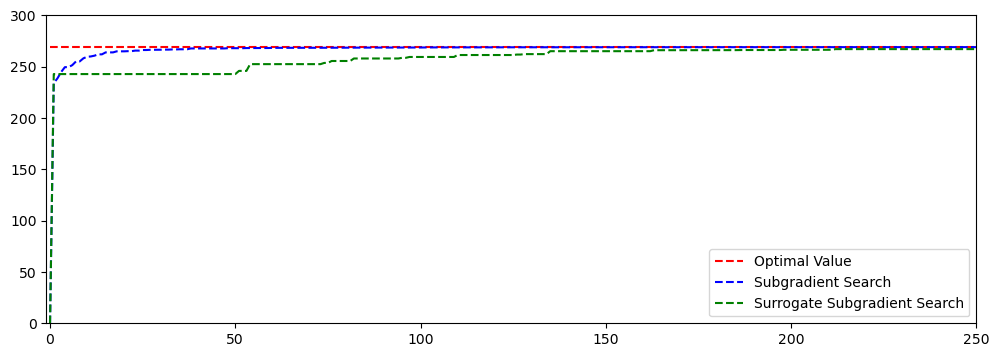

In [115]:
import matplotlib.pyplot as plt

fit, ax = plt.subplots(1, 1, figsize=(12, 4))

opt_obj = approximator_ss.best_bound
ax.plot(iterations_ss, np.ones(len(iterations_ss))*opt_obj, 'r--', label='Optimal Value')
ax.plot(iterations_ss, lower_bounds_ss, 'b--', label='Subgradient Search')
ax.plot(iterations_sss, lower_bounds_sss, 'g--', label='Surrogate Subgradient Search')

ax.set_xlim(-1, 250)
ax.set_ylim(0, 300)

ax.legend(loc='lower right')

## Alternative Relaxation

In this section, we explore the performance of Lagrangian Relaxation if a different set of constraints were lifted into the objective function.
The reformulation takes on the following form:

\begin{align}
q(u) = \text{min.} &\quad \sum_{i=1}^{n} \sum_{j=1}^{m} c_{ij} x_{ij} + \sum_{j=1}^m u_j (\sum_{i=1}^{n} r_{ij} x_{ij} - b_j) \label{gap-lr2-obj}\\
\text{s.t.} &\quad \sum_{j=1}^{m} x_{ij} = 1, \ \forall i = 1, 2, ..., n \label{gap-lr2-cons1}\\
&\quad x_{ij} \in \{0, 1\}, \ \forall i = 1, 2, ..., n, j = 1, 2, ..., m \label{gap-lr2-cons3}
\end{align}

The corresponding dual problem is defined as below:

\begin{align}
\text{max.} &\quad q(u) \\
\text{s.t.} &\quad u \geq 0
\end{align}

Note that any violation of the relaxed constraints is penalized by a positive $u$ multiplier.

## Comparison with Linear Programming Relaxation

Now we have two forms of Lagrangian Relaxations and we give here some empirical performance evidence of the strength of this relaxation against linear programming relaxation.